In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from enefit_challenge.utils.dataset import load_enefit_training_data

In [3]:
df = load_enefit_training_data()

In [4]:
df.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id', 'date',
       'time', 'year', 'datediff_in_days', 'hour', 'hour_sine', 'hour_cosine',
       'dayofweek', 'dayofweek_sine', 'dayofweek_cosine', 'week', 'week_sine',
       'week_cosine', 'month', 'month_sine', 'month_cosine',
       'target_1_days_ago', 'target_7_days_ago', 'eic_count',
       'installed_capacity', 'euros_per_mwh', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'temperature_min_f', 'temperature_mean_f',
       'temperature_max_f', 'temperature_std_f', 'dewpoint_min_f',
       'dewpoint_mean_f', 'dewpoint_max_f', 'dewpoint_std_f',
       'cloudcover_high_min_f', 'cloudcover_high_mean_f',
       'cloudcover_high_max_f', 'cloudcover_high_std_f',
       'cloudcover_low_min_f', 'cloudcover_low_mean_f', 'cloudcover_low_max_f',
       'cloudcover_low_std_f', 'cloudcover_mid_min_f', 'cloudcover_mid_mean_f',
       'cloudcover

In [5]:
df[["target_7_days_ago", "dayofweek"]].corr(method="pearson")

,target_7_days_ago,dayofweek
target_7_days_ago,1.000000,-0.021656
dayofweek,-0.021656,1.000000


In [6]:
df[["target_7_days_ago", "dayofweek"]].corr(method="spearman")

,target_7_days_ago,dayofweek
target_7_days_ago,1.000000,-0.003681
dayofweek,-0.003681,1.000000


In [7]:
df[["target_7_days_ago", "dayofweek"]].corr(method="kendall")

,target_7_days_ago,dayofweek
target_7_days_ago,1.000000,-0.002654
dayofweek,-0.002654,1.000000


In [8]:
np.array(df[["target_7_days_ago", "dayofweek"]])

array([[    nan,   2.   ],
       [    nan,   2.   ],
       [    nan,   2.   ],
       ...,
       [ 20.308,   2.   ],
       [  1.969,   2.   ],
       [195.707,   2.   ]])

In [9]:
no_nas = df[["target_7_days_ago", "dayofweek"]].dropna()

In [10]:
no_nas

,target_7_days_ago,dayofweek
20496,43.957,2
20497,0.000,2
20498,77.071,2
20499,0.000,2
20500,0.000,2
...,...,...
2017819,629.720,2
2017820,0.198,2
2017821,20.308,2
2017822,1.969,2


In [11]:
np.array(no_nas)

array([[ 43.957,   2.   ],
       [  0.   ,   2.   ],
       [ 77.071,   2.   ],
       ...,
       [ 20.308,   2.   ],
       [  1.969,   2.   ],
       [195.707,   2.   ]])

In [12]:
import json
with open("feature_importance_split.json") as f:
    importances = json.load(f)


In [13]:
feat_imp = pd.Series(importances)

feat_imp.describe(percentiles=[x/20 for x in range(1,20)])

count     91.000000
mean      29.010989
std       57.184787
min        0.000000
5%         0.000000
10%        0.000000
15%        1.000000
20%        2.000000
25%        2.500000
30%        3.000000
35%        4.000000
40%        5.000000
45%        6.500000
50%        9.000000
55%       10.000000
60%       13.000000
65%       18.000000
70%       23.000000
75%       23.000000
80%       34.000000
85%       44.000000
90%       78.000000
95%      136.000000
max      332.000000
dtype: float64

In [14]:
feat_imp = feat_imp[feat_imp >= 10]

In [15]:
feat_imp = feat_imp.reset_index(name="features")

In [33]:
feat_imp

,index,features
0,is_business,23
1,is_consumption,157
2,datediff_in_days,66
3,hour,104
4,hour_sine,17
5,hour_cosine,92
6,dayofweek,149
7,dayofweek_sine,66
8,dayofweek_cosine,23
9,week,78


In [16]:
feat_imp["index"]

0                                  is_business
1                               is_consumption
2                             datediff_in_days
3                                         hour
4                                    hour_sine
5                                  hour_cosine
6                                    dayofweek
7                               dayofweek_sine
8                             dayofweek_cosine
9                                         week
10                                   week_sine
11                                 week_cosine
12                           target_1_days_ago
13                           target_7_days_ago
14                                   eic_count
15                          installed_capacity
16                               euros_per_mwh
17                        lowest_price_per_mwh
18                       highest_price_per_mwh
19                           temperature_min_f
20                          temperature_mean_f
21           

In [17]:
df.shape

(2017824, 80)

In [18]:
categorical_features = ['county', 'product_type']
df = pd.get_dummies(df, columns=categorical_features)


In [19]:
df_filtered = df[feat_imp["index"]]

df_filtered.shape

(2017824, 44)

In [20]:
df_filtered["county_0"] = df_filtered["county_0"].astype(int)
df_filtered["county_14"] = df_filtered["county_14"].astype(int)
df_filtered.describe()

/var/folders/2c/394jj2r140x4jgq0vzwn32680000gn/T/ipykernel_6432/1642540501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["county_0"] = df_filtered["county_0"].astype(int)
/var/folders/2c/394jj2r140x4jgq0vzwn32680000gn/T/ipykernel_6432/1642540501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["county_14"] = df_filtered["county_14"].astype(int)


,is_business,is_consumption,datediff_in_days,hour,hour_sine,hour_cosine,dayofweek,dayofweek_sine,dayofweek_cosine,week,...,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f,surface_solar_radiation_downwards_std_f,total_precipitation_mean_f,total_precipitation_max_f,county_0,county_14
count,2.017824e+06,2017824.0,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,...,1.987088e+06,1.987088e+06,1.987088e+06,1.987088e+06,1.987088e+06,1.986478e+06,1.987088e+06,1.987088e+06,2.017824e+06,2.017824e+06
mean,5.368268e-01,0.5,3.218754e+02,1.150222e+01,-1.850272e-04,-1.850272e-04,2.997336e+00,1.754328e-03,-3.739087e-04,2.612719e+01,...,1.466001e+02,1.951182e+02,8.972752e+01,1.096979e+02,1.270122e+02,1.299591e+01,7.808575e-05,2.210202e-04,1.054958e-01,6.233249e-02
std,4.986421e-01,0.5,1.826310e+02,6.921728e+00,7.071069e-01,7.071069e-01,1.998619e+00,7.075807e-01,7.066306e-01,1.593492e+01,...,2.427981e+02,2.884707e+02,1.608768e+02,1.832312e+02,2.038366e+02,2.625529e+01,2.127488e-04,5.642029e-04,3.071913e-01,2.417585e-01
min,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-9.749279e-01,-9.009689e-01,1.000000e+00,...,-3.437500e-01,-2.813889e-01,-3.258333e-01,-1.826389e-01,-1.244444e-01,0.000000e+00,-7.599592e-06,-2.812594e-07,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.0,1.660000e+02,6.000000e+00,-7.071068e-01,-7.071068e-01,1.000000e+00,-7.818315e-01,-9.009689e-01,1.200000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.5,3.230000e+02,1.200000e+01,0.000000e+00,-1.836970e-16,3.000000e+00,0.000000e+00,-2.225209e-01,2.400000e+01,...,3.091146e-02,2.844444e-01,3.866667e-01,7.545679e-01,1.173377e+00,1.984715e-01,4.633783e-06,1.723193e-05,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.0,4.790000e+02,1.800000e+01,7.071068e-01,7.071068e-01,5.000000e+00,7.818315e-01,6.234898e-01,4.100000e+01,...,2.181357e+02,3.825022e+02,1.034025e+02,1.474623e+02,1.855123e+02,1.322982e+01,4.918961e-05,1.698396e-04,0.000000e+00,0.000000e+00
max,1.000000e+00,1.0,6.370000e+02,2.300000e+01,1.000000e+00,1.000000e+00,6.000000e+00,9.749279e-01,1.000000e+00,5.200000e+01,...,9.144176e+02,9.544222e+02,8.237189e+02,8.289692e+02,8.487144e+02,3.953976e+02,9.637594e-03,1.651621e-02,1.000000e+00,1.000000e+00


In [21]:
df_filtered.dtypes

is_business                                   int64
is_consumption                                int64
datediff_in_days                              int64
hour                                          int32
hour_sine                                   float64
hour_cosine                                 float64
dayofweek                                     int32
dayofweek_sine                              float64
dayofweek_cosine                            float64
week                                          int32
week_sine                                   float64
week_cosine                                 float64
target_1_days_ago                           float64
target_7_days_ago                           float64
eic_count                                   float64
installed_capacity                          float64
euros_per_mwh                               float64
lowest_price_per_mwh                        float64
highest_price_per_mwh                       float64
temperature_

In [22]:
df_consumption = df_filtered[df_filtered["is_consumption"]==1].drop("is_consumption", axis=1)
df_consumption

,is_business,datediff_in_days,hour,hour_sine,hour_cosine,dayofweek,dayofweek_sine,dayofweek_cosine,week,week_sine,...,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f,surface_solar_radiation_downwards_std_f,total_precipitation_mean_f,total_precipitation_max_f,county_0,county_14
1,0,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,0,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5,1,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,1,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
9,1,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017815,0,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2017817,0,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2017819,1,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2017821,1,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [23]:
df_production = df_filtered[df_filtered["is_consumption"]==0].drop("is_consumption", axis=1)
df_production

,is_business,datediff_in_days,hour,hour_sine,hour_cosine,dayofweek,dayofweek_sine,dayofweek_cosine,week,week_sine,...,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f,surface_solar_radiation_downwards_std_f,total_precipitation_mean_f,total_precipitation_max_f,county_0,county_14
0,0,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,0,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,1,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8,1,0,0,0.000000,1.000000,2,0.974928,-0.222521,35,-0.822984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017814,1,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2017816,0,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2017818,0,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2017820,1,637,23,-0.258819,0.965926,2,0.974928,-0.222521,22,0.568065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


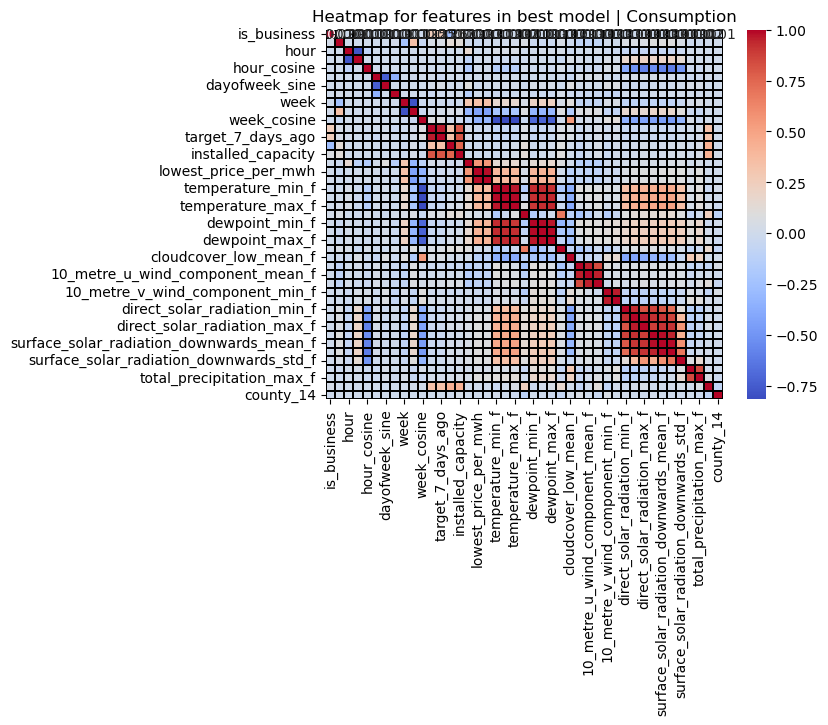

In [24]:
ax = sns.heatmap(df_consumption.fillna(0).corr(), annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=0.3)

plt.title("Heatmap for features in best model | Consumption")
plt.show()

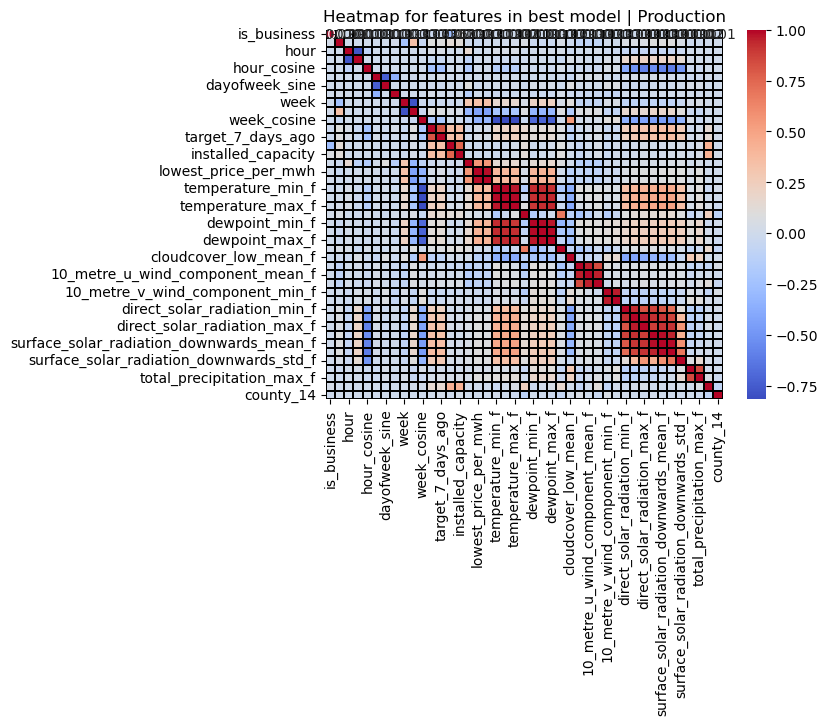

In [25]:
ax = sns.heatmap(df_production.fillna(0).corr(), annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=0.3)

plt.title("Heatmap for features in best model | Production")
plt.show()

In [28]:
corr_consumption = df_consumption.fillna(0).corr()
# Set the threshold for correlation
threshold = 0.5

# Extract features with correlation greater than the threshold
correlated_features = set()
for i in range(len(corr_consumption.columns)):
    for j in range(i):
        if abs(corr_consumption.iloc[i, j]) > threshold:
            colname = corr_consumption.columns[i]
            correlated_features.add(colname)

# Convert the set to a list
correlated_features_consumption = list(correlated_features)

correlated_features_consumption

['temperature_min_f',
 'dayofweek_sine',
 'surface_solar_radiation_downwards_std_f',
 'highest_price_per_mwh',
 'dewpoint_min_f',
 'direct_solar_radiation_mean_f',
 '10_metre_u_wind_component_max_f',
 'direct_solar_radiation_max_f',
 'dewpoint_mean_f',
 'total_precipitation_max_f',
 'temperature_max_f',
 '10_metre_u_wind_component_mean_f',
 'installed_capacity',
 'week_sine',
 'surface_solar_radiation_downwards_min_f',
 'dewpoint_std_f',
 'hour_sine',
 'surface_solar_radiation_downwards_mean_f',
 'lowest_price_per_mwh',
 'cloudcover_low_mean_f',
 'temperature_mean_f',
 'target_7_days_ago',
 '10_metre_v_wind_component_mean_f',
 'dewpoint_max_f',
 'surface_solar_radiation_downwards_max_f']

In [29]:
corr_production = df_production.fillna(0).corr()
# Set the threshold for correlation
threshold = 0.5

# Extract features with correlation greater than the threshold
correlated_features = set()
for i in range(len(corr_production.columns)):
    for j in range(i):
        if abs(corr_production.iloc[i, j]) > threshold:
            colname = corr_production.columns[i]
            correlated_features.add(colname)

# Convert the set to a list
correlated_features_production = list(correlated_features)

correlated_features_production

['temperature_min_f',
 'dayofweek_sine',
 'surface_solar_radiation_downwards_std_f',
 'highest_price_per_mwh',
 'dewpoint_min_f',
 'direct_solar_radiation_mean_f',
 '10_metre_u_wind_component_max_f',
 'direct_solar_radiation_max_f',
 'dewpoint_mean_f',
 'total_precipitation_max_f',
 'temperature_max_f',
 '10_metre_u_wind_component_mean_f',
 'installed_capacity',
 'week_sine',
 'surface_solar_radiation_downwards_min_f',
 'dewpoint_std_f',
 'hour_sine',
 'surface_solar_radiation_downwards_mean_f',
 'lowest_price_per_mwh',
 'cloudcover_low_mean_f',
 'temperature_mean_f',
 'target_7_days_ago',
 '10_metre_v_wind_component_mean_f',
 'dewpoint_max_f',
 'surface_solar_radiation_downwards_max_f']

In [36]:
feat_imp[feat_imp["index"].isin(correlated_features_consumption)].reset_index(drop=True)

,index,features
0,hour_sine,17
1,dayofweek_sine,66
2,week_sine,23
3,target_7_days_ago,332
4,installed_capacity,160
5,lowest_price_per_mwh,38
6,highest_price_per_mwh,41
7,temperature_min_f,12
8,temperature_mean_f,19
9,temperature_max_f,30


In [38]:
correlation_matrix = df_consumption.fillna(0).corr()

# Set the threshold for correlation
threshold = 0.5

# Create a dictionary to store correlated features
correlation_dict = {}

# Iterate through columns (features)
for feature in correlation_matrix.columns:
    # Extract features with correlation greater than the threshold
    correlated_features = list(correlation_matrix[feature][abs(correlation_matrix[feature]) > threshold].index)
    
    # Remove the feature itself from the list
    correlated_features.remove(feature)
    
    # Store the list in the dictionary
    correlation_dict[feature] = correlated_features

# Print the dictionary
print("Correlation Dictionary:")
correlation_dict

Correlation Dictionary:


{'is_business': [],
 'datediff_in_days': [],
 'hour': ['hour_sine'],
 'hour_sine': ['hour'],
 'hour_cosine': ['direct_solar_radiation_mean_f',
  'direct_solar_radiation_max_f',
  'surface_solar_radiation_downwards_min_f',
  'surface_solar_radiation_downwards_mean_f',
  'surface_solar_radiation_downwards_max_f'],
 'dayofweek': ['dayofweek_sine'],
 'dayofweek_sine': ['dayofweek'],
 'dayofweek_cosine': [],
 'week': ['week_sine'],
 'week_sine': ['week'],
 'week_cosine': ['temperature_min_f',
  'temperature_mean_f',
  'temperature_max_f',
  'dewpoint_min_f',
  'dewpoint_mean_f',
  'dewpoint_max_f',
  'cloudcover_low_mean_f'],
 'target_1_days_ago': ['target_7_days_ago', 'installed_capacity'],
 'target_7_days_ago': ['target_1_days_ago', 'installed_capacity'],
 'eic_count': ['installed_capacity'],
 'installed_capacity': ['target_1_days_ago', 'target_7_days_ago', 'eic_count'],
 'euros_per_mwh': ['lowest_price_per_mwh', 'highest_price_per_mwh'],
 'lowest_price_per_mwh': ['euros_per_mwh', 'highes

In [50]:
df_correlation = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlated Features']).set_index('Feature')
df_correlation = df_correlation.join(feat_imp.set_index("index", drop=True))
df_correlation = df_correlation.rename(columns={"features":"feat_imp"})
df_correlation = df_correlation.sort_values(by="feat_imp", ascending=False)
df_correlation

,Correlated Features,feat_imp
Feature,,
target_7_days_ago,"[target_1_days_ago, installed_capacity]",332
target_1_days_ago,"[target_7_days_ago, installed_capacity]",325
installed_capacity,"[target_1_days_ago, target_7_days_ago, eic_count]",160
dayofweek,[dayofweek_sine],149
direct_solar_radiation_mean_f,"[hour_cosine, direct_solar_radiation_min_f, di...",123
eic_count,[installed_capacity],105
hour,[hour_sine],104
hour_cosine,"[direct_solar_radiation_mean_f, direct_solar_r...",92
week,[week_sine],78


We want to drop the feature if:
* the correlation list is not empty -> feature it's related to another at least at 50%
* if the list is not empty, all feautures in the list should have greater importance than the one in the index

In [60]:
# Function to filter rows based on conditions
def custom_filter(row):
    correlated_features = row['Correlated Features']
    feat_imp_value = row['feat_imp']

    # Check if the list is not empty and feat_imp is greater than the max feat_imp in the correlated features
    if correlated_features and all(df_correlation.loc[feature, 'feat_imp'] > feat_imp_value for feature in correlated_features):
        return False  # Drop the row
    return True  # Keep the row

# Apply the custom filter function to drop rows
filtered_df_corr = df_correlation[df_correlation.apply(custom_filter, axis=1)]
filtered_df_corr

,Correlated Features,feat_imp
Feature,,
target_7_days_ago,"[target_1_days_ago, installed_capacity]",332
target_1_days_ago,"[target_7_days_ago, installed_capacity]",325
installed_capacity,"[target_1_days_ago, target_7_days_ago, eic_count]",160
dayofweek,[dayofweek_sine],149
direct_solar_radiation_mean_f,"[hour_cosine, direct_solar_radiation_min_f, di...",123
hour,[hour_sine],104
hour_cosine,"[direct_solar_radiation_mean_f, direct_solar_r...",92
week,[week_sine],78
datediff_in_days,[],66


In [61]:
len(filtered_df_corr)

32

In [62]:
dropped = set(df_correlation.index) - set(filtered_df_corr.index)
dropped

{'10_metre_u_wind_component_mean_f',
 '10_metre_v_wind_component_min_f',
 'cloudcover_low_mean_f',
 'dayofweek_sine',
 'direct_solar_radiation_max_f',
 'eic_count',
 'euros_per_mwh',
 'hour_sine',
 'temperature_min_f',
 'total_precipitation_max_f',
 'week_sine'}